# Content List



01 Importing Libraries and Data
02 Data Security
03 Creating a regional segmentation of the data
04 Creating a dataframe excluding customers with less than 5 orders
05 Customer Profiling
06 Visualizations
07 Exporting Visualizations
08 Checking for patterns across regions and departments + Charts
09 Exporting Visualization
10 Exporting Dataframe



# 1 Importing Libraries and Data

In [117]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [118]:
path = r'/Users/a/Career Foundry/Achievement 4/02 Data/02 Prepared Data'

In [136]:
path

'/Users/a/Career Foundry/Achievement 4/02 Data/02 Prepared Data'

In [137]:
df= pd.read_pickle(os.path.join(path, 'Achievement 10.pkl')) 



In [138]:
df

,user_id,First Name,surname,Gender,state,Age,n_dependants,family_status,income,order_id,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spendings,spending_flag,order frequency,order_frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,2543867,...,Mid-range product,regularly busy,Regularly busy,Fewest orders,8.0,New customer,12.6,High spender,30.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,1285508,...,Mid-range product,regularly busy,Regularly busy,Fewest orders,8.0,New customer,12.6,High spender,30.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,2578584,...,Mid-range product,regularly busy,Regularly busy,Fewest orders,8.0,New customer,12.6,High spender,30.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,423547,...,Mid-range product,regularly busy,Regularly busy,Fewest orders,8.0,New customer,12.6,High spender,30.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,2524893,...,Mid-range product,regularly busy,Regularly busy,Fewest orders,8.0,New customer,12.6,High spender,30.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534190,167749,Deborah,Farrell,Female,Florida,28,1,married,30169,2176275,...,Mid-range product,busiest day,Busiest days,Fewest orders,5.0,New customer,12.3,High spender,16.0,Regular customer
1534191,186595,Ruth,Cunningham,Female,Mississippi,38,1,married,92727,1816266,...,Mid-range product,regularly busy,Regularly busy,Fewest orders,6.0,New customer,12.3,High spender,30.0,Regular customer
1534192,186595,Ruth,Cunningham,Female,Mississippi,38,1,married,92727,908811,...,Mid-range product,busiest day,Busiest days,Fewest orders,6.0,New customer,12.3,High spender,30.0,Regular customer
1534193,186595,Ruth,Cunningham,Female,Mississippi,38,1,married,92727,93226,...,Mid-range product,regularly busy,Regularly busy,Fewest orders,6.0,New customer,12.3,High spender,30.0,Regular customer


In [139]:
df.columns

Index(['user_id', 'First Name', 'surname', 'Gender', 'state', 'Age',
       'n_dependants', 'family_status', 'income', 'order_id', 'order_number',
       'orders_day_of_week', 'time_orders', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spendings',
       'spending_flag', 'order frequency', 'order_frequency_flag'],
      dtype='object')

# 2 Data Security

The dataframe containes sensitive PII data such as First Name, Surname, Age that need to be stored and used carefully according to data security regulations

# 3 Creating a regional segmentation of the data

In [140]:
region = []
for state in df['state']:
    if (state == 'Wisconsin') or (state == 'Michigan') or (state == 'Illinois') or (state == 'Indiana') or (state == 'Ohio') or (state == 'North Dakota') or (state == 'South Dakota') or (state == 'Nebraska') or (state == 'Minnesota') or (state == 'Iowa') or (state == 'Missouri') or (state == 'Kansas'):
        region.append('Midwest')
    elif (state == 'Maine') or (state == 'New Hampshire') or (state == 'Vermont') or (state == 'Massachusetts') or (state == 'Rhode Island') or (state == 'Connecticut') or (state == 'New York') or (state == 'Pennsylvania') or (state =='New Jersey'):
        region.append('Northeast')
    elif (state == 'Deleware') or (state == 'Maryland') or (state == 'District of Columbia') or (state == 'Virginia') or (state == 'West Virginia') or (state == 'North Carolina') or (state == 'South Carolina') or (state == 'Georgia') or (state == 'Florida') or (state == 'Kentucky') or (state == 'Tennessee') or (state == 'Mississippi') or (state == 'Alabama') or (state == 'Oklahoma') or (state == 'Texas') or (state == 'Arkansas') or (state == 'Louisiana'):
        region.append('South')
    else:
        region.append('West')


In [141]:
region

['Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'South',
 'South',
 'South',
 'South',
 'South',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'South',
 'South',
 'South',
 'South',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 

In [142]:
df['region'] = region

In [143]:
# Checking code
df['region'].value_counts(dropna = False)

South        482255
West         423373
Midwest      357709
Northeast    270858
Name: region, dtype: int64

In [144]:
# Creating crosstab of spending habits of different US regions
crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [145]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,327728,29981
Northeast,247842,23016
South,442705,39550
West,388431,34942


# 4 Creating a dataframe excluding customers with less than 5 orders



In [146]:
# excluding customers with less than 5 order
df2 = df[df['max_order'] > 5]

# 5 Customer Profiling

In [147]:
# Creating Income brackets
df.loc[df['income'] < 30000, 'income_status'] = 'Low Income'
df.loc[(df['income'] <= 100000) & (df['income'] > 30000), 'income_status'] = 'Medium Income'
df.loc[df['income'] >= 100000, 'income_status'] = 'High Income'

In [148]:
# Creating Age brackets
df.loc[df['Age'] < 18, 'age_status'] = 'Underage'
df.loc[(df['Age'] <= 30) & (df['Age'] > 18), 'age_status'] = 'Young Adults'
df.loc[df['Age'] > 30, 'age_status'] = 'Adults'

In [149]:
# Creating Price brackets
df.loc[df['prices'] < 5, 'price_range'] = 'Low Price Range'
df.loc[(df['prices'] <= 10) & (df['prices'] > 5), 'price_range'] = 'Medium Price Range'
df.loc[df['prices'] > 10,'price_range'] = 'High Price Range' 

In [154]:
# Creating a flag for department_id
df.loc[df['department_id'] == 1, 'products'] = 'Frozen'
df.loc[df['department_id'] == 2, 'products'] = 'Other'
df.loc[df['department_id'] == 3, 'products'] = 'Bakery'
df.loc[df['department_id'] == 4, 'products'] = 'Produce'
df.loc[df['department_id'] == 5, 'products'] = 'Alcohol'
df.loc[df['department_id'] == 6, 'products'] = 'international'
df.loc[df['department_id'] == 7, 'products'] = 'beverages'
df.loc[df['department_id'] == 8, 'products'] = 'pets'
df.loc[df['department_id'] == 9, 'products'] = 'dry goods pasta'
df.loc[df['department_id'] == 10, 'products'] = 'bulk'
df.loc[df['department_id'] == 11, 'products'] = 'personal care'
df.loc[df['department_id'] == 12, 'products'] = 'meat seafood'
df.loc[df['department_id'] == 13, 'products'] = 'pantry'
df.loc[df['department_id'] == 14, 'products'] = 'breakfast'
df.loc[df['department_id'] == 15, 'products'] = 'canned goods'
df.loc[df['department_id'] == 16, 'products'] = 'dairy eggs'
df.loc[df['department_id'] == 17, 'products'] = 'household'
df.loc[df['department_id'] == 18, 'products'] = 'babies'
df.loc[df['department_id'] == 19, 'products'] = 'snacks'
df.loc[df['department_id'] == 20, 'products'] = 'missing'









In [156]:
# Checking if there is a link between family status and types of items purchased
crosstab_1 = pd.crosstab(df['products'], df['family_status'], dropna = False)

In [157]:
# Checking if there is a link between ages and types of items purchased
crosstab_2 = pd.crosstab(df['products'], df['age_status'], dropna = False)


In [82]:
# Checking for link between age and income
crosstab_3 = pd.crosstab(df['age_status'], df['income_status'], dropna = False)

In [83]:
# Checking for link between family status and prices
crosstab_4 = pd.crosstab(df['family_status'], df['price_range'], dropna = False)


In [84]:
# Checking for link between family status and income
crosstab_5 = pd.crosstab(df['family_status'], df['income_status'], dropna = False)



In [85]:
# What time do people spend the most?
crosstab_6 = pd.crosstab(df['time_orders'], df['spending_flag'], dropna = False)


In [86]:
# Checking for link between age order frequency
crosstab_7 = pd.crosstab(df['age_status'], df['order_frequency_flag'], dropna = False)


# 6 Visualizations

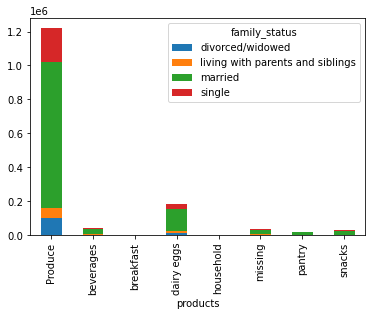

In [25]:
# Visualization for Crosstab 1
bar_1 = crosstab_1.plot.bar(stacked = True)

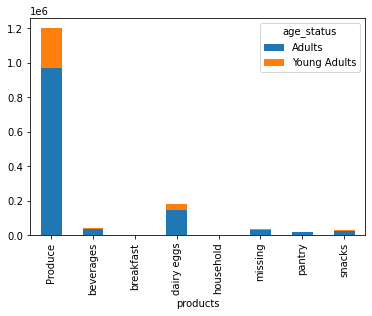

In [26]:
# Visualization for Crosstab 2
bar_2 = crosstab_2.plot.bar(stacked = True)

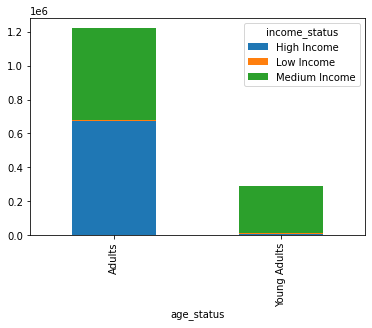

In [27]:
# Visualization for Crosstab 3
bar_3 = crosstab_3.plot.bar(stacked = True)

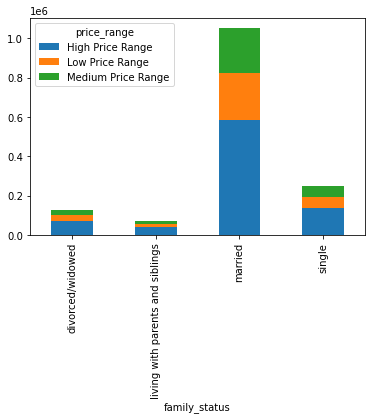

In [28]:
# Visualization for Crosstab 4
bar_4 = crosstab_4.plot.bar(stacked = True)

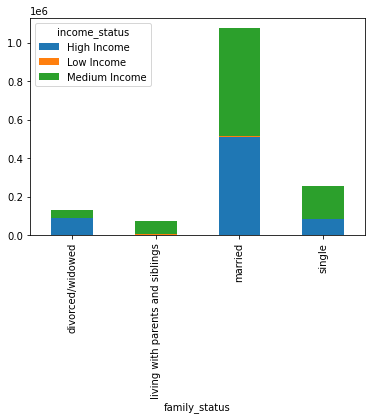

In [29]:
# Visualization for Crosstab 5


bar_5 = crosstab_5.plot.bar(stacked = True)

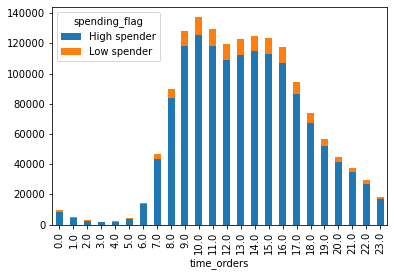

In [54]:
# Visualization for Crosstab 6


bar_6 = crosstab_6.plot.bar(stacked = True)

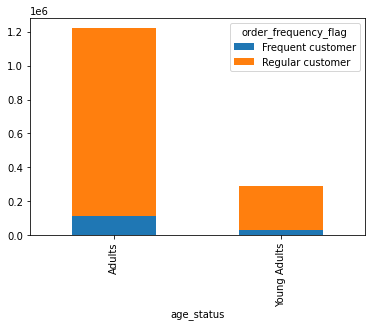

In [31]:
# Visualization for Crosstab 7

bar_7 = crosstab_7.plot.bar(stacked = True)

# 07 Exporting Visualizations

In [32]:
path = r'/Users/a/Career Foundry/Achievement 4/04 Analysis/01 Visualizations'

In [33]:
path

'/Users/a/Career Foundry/Achievement 4/04 Analysis/01 Visualizations'

In [34]:
bar_1.figure.savefig(os.path.join(path, 'bar_1.png'))

In [35]:
bar_2.figure.savefig(os.path.join(path, 'bar_2.png'))

In [36]:
bar_3.figure.savefig(os.path.join(path, 'bar_3.png'))

In [37]:
bar_4.figure.savefig(os.path.join(path, 'bar_4.png'))

In [38]:
bar_5.figure.savefig(os.path.join(path, 'bar_5.png'))

In [39]:
bar_6.figure.savefig(os.path.join(path, 'bar_6.png'))

In [40]:
bar_7.figure.savefig(os.path.join(path, 'bar_7.png'))

# 08 Checking for patterns across regions and departments + Charts

checking for patterns across regions



In [41]:
crosstab_8 = pd.crosstab(df['region'], df['age_status'], dropna = False)

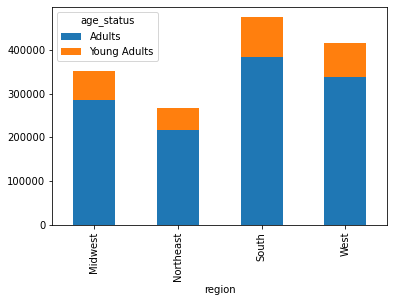

In [42]:
bar_8 = crosstab_8.plot.bar(stacked = True)

In [43]:
crosstab_9 = pd.crosstab(df['region'], df['income_status'], dropna = False)

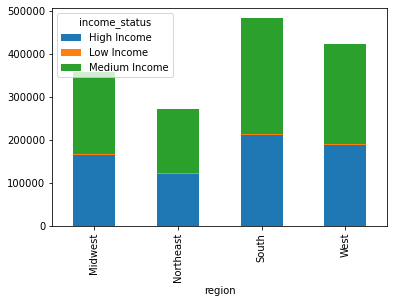

In [44]:
bar_9 = crosstab_9.plot.bar(stacked = True)

In [25]:
crosstab_10 = pd.crosstab(df['region'], df['order_frequency_flag'], dropna = False)

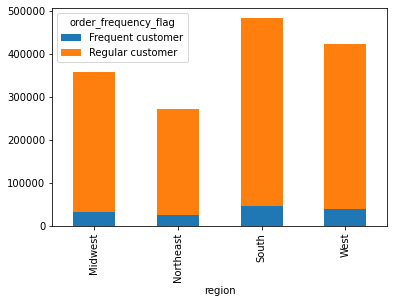

In [46]:
bar_10 = crosstab_10.plot.bar(stacked = True)

checking for patterns across different departments



In [47]:
crosstab_11 = pd.crosstab(df['products'], df['income_status'], dropna = False)

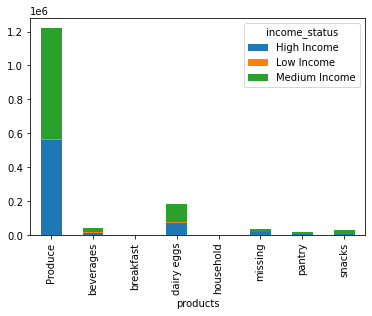

In [48]:
bar_11 = crosstab_11.plot.bar(stacked = True)

In [186]:
crosstab_12 = pd.crosstab(df['products'], df['age_status'], dropna = False)

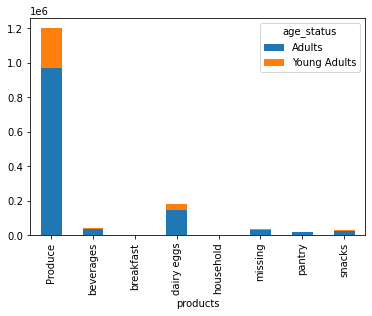

In [187]:
bar_12 = crosstab_12.plot.bar(stacked = True)

In [188]:
crosstab_13 = pd.crosstab(df['products'], df['order_frequency_flag'], dropna = False)

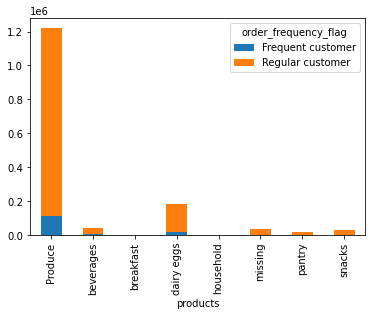

In [189]:
bar_13 = crosstab_13.plot.bar(stacked = True)

In [26]:
# What products are purchased the most in each region?
crosstab_14 = pd.crosstab(df['products'], df['region'], dropna = False)

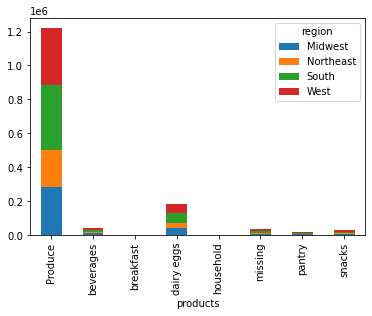

In [27]:
bar_14 = crosstab_14.plot.bar(stacked = True)

In [92]:
# Grouping products by price range
crosstab_15 = pd.crosstab(df['products'], df['price_range'], dropna = False)

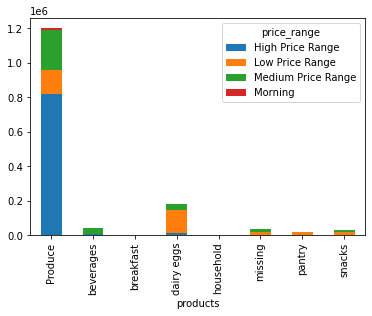

In [93]:
bar_15 = crosstab_15.plot.bar(stacked = True)

In [97]:
# Are old are the most loyal customers?
crosstab_16 = pd.crosstab(df['age_status'], df['loyalty_flag'], dropna = False)

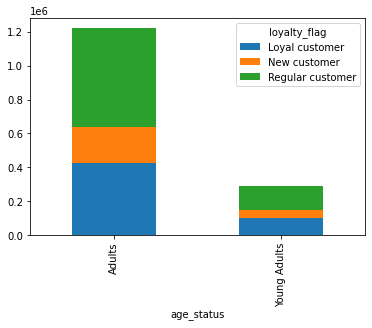

In [98]:
bar_16 = crosstab_16.plot.bar(stacked = True)

In [103]:
#How much do loyal customers order?
crosstab_17 = pd.crosstab(df['spending_flag'], df['loyalty_flag'], dropna = False)

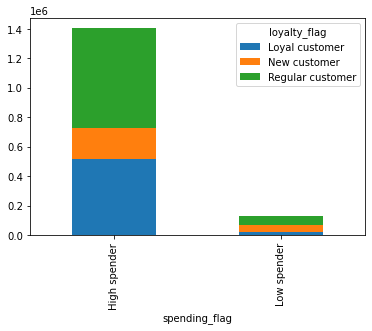

In [104]:
bar_17 = crosstab_17.plot.bar(stacked = True)

In [107]:
# What products to loyal customer order the most?
crosstab_18 = pd.crosstab(df['products'], df['loyalty_flag'], dropna = False)

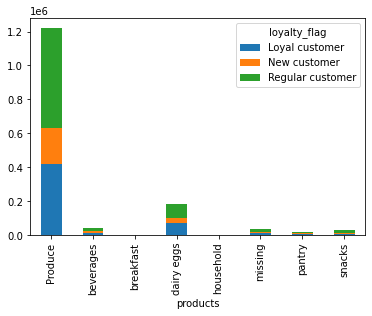

In [108]:
bar_18 = crosstab_18.plot.bar(stacked = True)

# 09 Exporting Visualizations

In [211]:
path = r'/Users/a/Career Foundry/Achievement 4/04 Analysis/01 Visualizations'

In [212]:
path

'/Users/a/Career Foundry/Achievement 4/04 Analysis/01 Visualizations'

In [213]:
bar_8.figure.savefig(os.path.join(path, 'bar_8.png'))

In [214]:
bar_9.figure.savefig(os.path.join(path, 'bar_9.png'))

In [215]:
bar_10.figure.savefig(os.path.join(path, 'bar_10.png'))

In [216]:
bar_11.figure.savefig(os.path.join(path, 'bar_11.png'))

In [217]:
bar_12.figure.savefig(os.path.join(path, 'bar_12.png'))

In [218]:
bar_13.figure.savefig(os.path.join(path, 'bar_13.png'))

In [28]:
bar_14.figure.savefig(os.path.join(path, 'bar_14.png'))

In [94]:
bar_15.figure.savefig(os.path.join(path, 'bar_15.png'))

In [99]:
bar_16.figure.savefig(os.path.join(path, 'bar_16.png'))

In [105]:
bar_17.figure.savefig(os.path.join(path, 'bar_17.png'))

# 10 Exporting Dataframe


In [95]:
path = r'/Users/a/Career Foundry/Achievement 4/02 Data/02 Prepared Data'

In [96]:
path

'/Users/a/Career Foundry/Achievement 4/02 Data/02 Prepared Data'

In [31]:
df.to_csv(os.path.join(path,'Achievement 10.csv'))